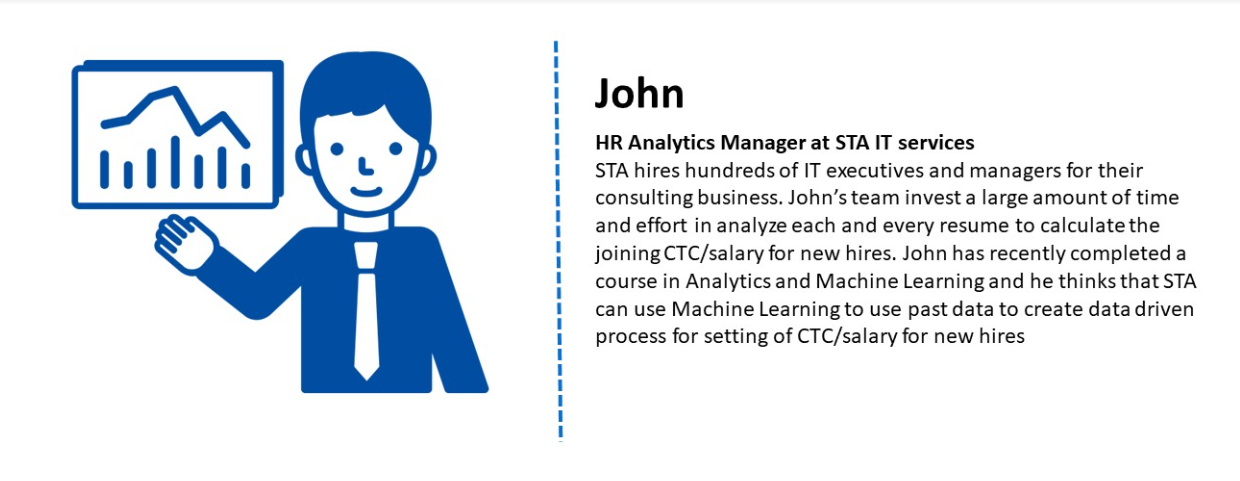

# Problem:
Your task is to help John from STA IT services to create a linear regression model in Python or R to predict the CTC/Salary of new hires from the data provided.

* Understand the data
* Transform categorical variables to the numerical variables
* Apply linear regression to predict the CTC
* Evaluate the results of the analysis

# Data

Data_file is a dataset that you will use to train your model.

size of training data : (1338*8)

Test_Data_file is a dataset that you will use to test your model and find out the Mean Square Value.

size of testing data : (1338*8)

### Result of data Visualization

* use Python to predict Salary of new candidate
* here we have 1338 rows and 10 columns
* we see manager or only one job change candidate get higher salary
* Previous job change and Graduation marks affect less on CTC
* Metro city candidate get higher salary then Non_Metro candidate
* there are outlier in CTC and Previous CTC
* there is no multicollinearity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import random
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
salary = pd.read_csv("Data_file.xlsx - Data.csv",skiprows=2 ,index_col=0)
salary


,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"
...,...,...,...,...,...,...,...,...
1334,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40"
1335,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75"
1336,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77"


In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   College               1338 non-null   object
 1   Role                  1338 non-null   object
 2   City type             1338 non-null   object
 3   Previous CTC          1338 non-null   object
 4   Previous job changes  1338 non-null   int64 
 5   Graduation marks      1338 non-null   int64 
 6   Exp (Months)          1338 non-null   int64 
 7   CTC                   1338 non-null   object
dtypes: int64(3), object(5)
memory usage: 94.1+ KB


In [56]:
salary.isna().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

In [5]:
salary.describe()

,Previous job changes,Graduation marks,Exp (Months)
count,1338.000000,1338.000000,1338.000000
mean,2.525411,59.890882,39.207025
std,1.123502,14.894696,14.049960
min,1.000000,35.000000,18.000000
25%,2.000000,47.000000,27.000000
50%,3.000000,60.000000,39.000000
75%,4.000000,73.000000,51.000000
max,4.000000,85.000000,64.000000


## Looking for categorical feature

In [6]:
categorical = [var for var in salary.columns if salary[var].dtype =='O']
print('There are {} numerical variables\n'.format(len(categorical)))
print('The numerical variables are :', categorical)

There are 5 numerical variables

The numerical variables are : ['College', 'Role', 'City type', 'Previous CTC', 'CTC']


In [7]:
np.unique(salary["CTC"])

array(['  100,119.53 ', '  100,497.31 ', '  100,715.13 ', ...,
       '  99,794.40 ', '  99,815.96 ', '  99,918.30 '], dtype=object)

#### Here we can see that our salary are catagorical , which can not be a possible, we have to convert this salary to a numerical feature

### Converting CTC and Previous CTC to a numrical feature

In [8]:
salary['CTC'] = salary['CTC'].str.replace('[\"  "\,]', "").astype('float64')
salary['Previous CTC'] = salary['Previous CTC'].str.replace('[\"  "\,]', "").astype('float64')

C:\Users\Shankar\AppData\Local\Temp\ipykernel_4684\1094578358.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  salary['CTC'] = salary['CTC'].str.replace('[\"  "\,]', "").astype('float64')
C:\Users\Shankar\AppData\Local\Temp\ipykernel_4684\1094578358.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  salary['Previous CTC'] = salary['Previous CTC'].str.replace('[\"  "\,]', "").astype('float64')


In [9]:
categorical = [var for var in salary.columns if salary[var].dtype =='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['College', 'Role', 'City type']


In [10]:
# viewing frequency of categorical variables
for var in categorical: 
    print(salary[var].value_counts())

Tier 1    649
Tier 2    364
Tier 3    325
Name: College, dtype: int64
Executive    1064
Manager       274
Name: Role, dtype: int64
Metro        676
Non-Metro    662
Name: City type, dtype: int64


In [11]:
# viewing frequency distribution of categorical data
for var in categorical: 
    print(salary[var].value_counts()/(len(salary)))

Tier 1    0.485052
Tier 2    0.272048
Tier 3    0.242900
Name: College, dtype: float64
Executive    0.795217
Manager      0.204783
Name: Role, dtype: float64
Metro        0.505232
Non-Metro    0.494768
Name: City type, dtype: float64


# Number of labels: cardinality

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the model.


In [12]:
# checking cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(salary[var].unique()), ' labels')

College  contains  3  labels
Role  contains  2  labels
City type  contains  2  labels


* we can see there are 2 label associated with Role and City type and and college have 3 label

## Looking at Numerical Variables

In [13]:
# finding numerical variables
numerical = [var for var in salary.columns if salary[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['Previous CTC', 'Previous job changes', 'Graduation marks', 'Exp (Months)', 'CTC']


In [14]:
salary[numerical].head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,
1,55523.0,3,66,19,71406.58
2,57081.0,1,84,18,68005.87
3,60347.0,2,52,28,76764.02
4,49010.0,2,81,33,82092.39
5,57879.0,4,74,32,73878.10


In [15]:
salary.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.339036
std,6685.600553,1.123502,14.894696,14.049960,12551.280147
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50547.000000,2.000000,47.000000,27.000000,66905.067500
50%,55293.500000,3.000000,60.000000,39.000000,73112.640000
75%,60150.500000,4.000000,73.000000,51.000000,80747.175000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


# Data Visualization

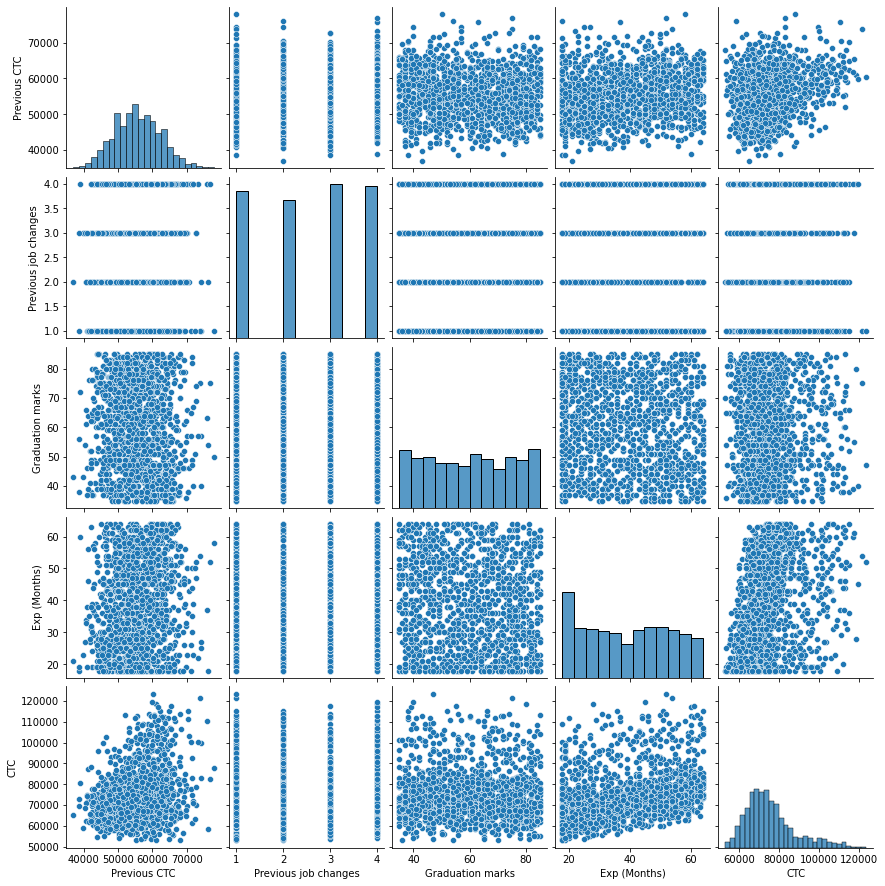

In [16]:
sns.pairplot(salary)

(<BarContainer object of 1338 artists>, <BarContainer object of 1338 artists>)

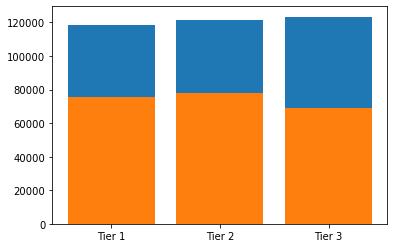

In [17]:
plt.bar('College', 'CTC', data = salary), plt.bar('College', 'Previous CTC', data = salary)


(<BarContainer object of 1338 artists>, <BarContainer object of 1338 artists>)

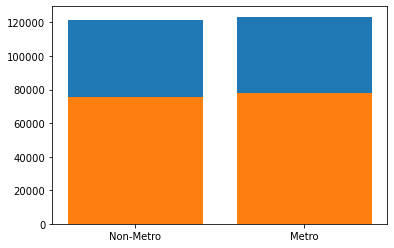

In [18]:
plt.bar('City type', 'CTC', data = salary), plt.bar('City type', 'Previous CTC', data = salary)

(<BarContainer object of 1338 artists>, <BarContainer object of 1338 artists>)

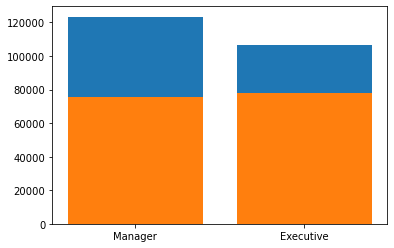

In [19]:
plt.bar('Role', 'CTC', data = salary), plt.bar('Role', 'Previous CTC', data = salary)

(<BarContainer object of 1338 artists>, <BarContainer object of 1338 artists>)

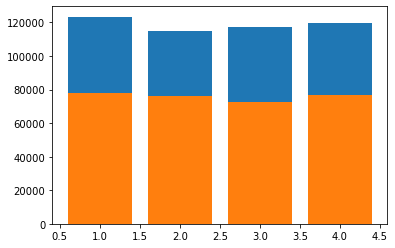

In [20]:
plt.bar('Previous job changes', 'CTC', data = salary), plt.bar('Previous job changes', 'Previous CTC', data = salary)

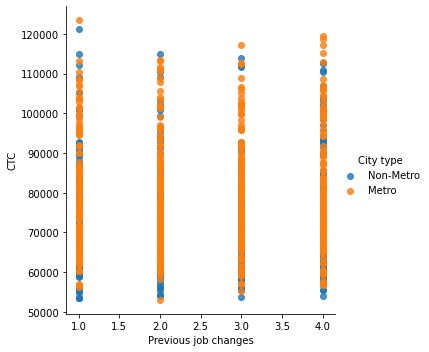

In [21]:
sns.lmplot(x = "Previous job changes", y = "CTC", hue = "City type", data = salary,legend = True, fit_reg=False)

<AxesSubplot:xlabel='Previous job changes', ylabel='CTC'>

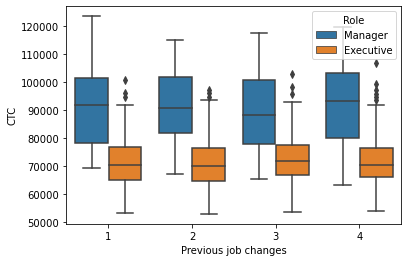

In [22]:
sns.boxplot(x = "Previous job changes", y = "CTC", hue = "Role", data = salary)

<AxesSubplot:>

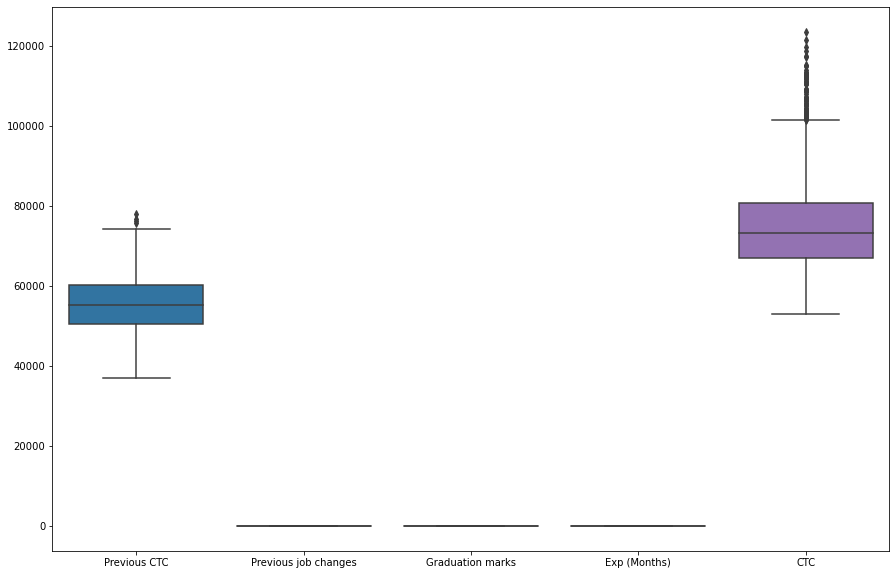

In [23]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = salary, ax = ax)

#### we can see there are outlier in CTC and Previous CTC

# Multicollinearity


* Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.


* Two variables are perfectly collinear if there’s a particular linear relationship between them.


* If we see Multicollinearity in data, then the regression coefficients are not uniquely determined. In turn it hurts the interpretability of the model as then the regression coefficients are not unique and have influences from other features.


* We use Correlation Matrix to see Multicollinearity
 

In [24]:
# printing the Correlation Matrix
cm = salary.corr()
cm

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
Previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp (Months),0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,0.270260,0.007518,-0.017557,0.301569,1.000000


<AxesSubplot:>

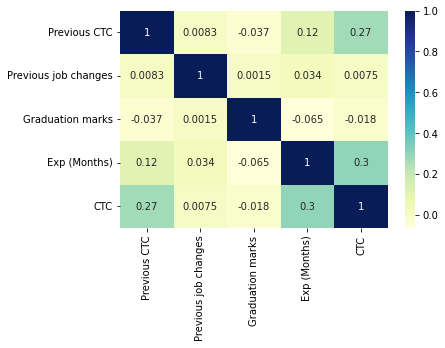

In [25]:
# visualizing Correlation matrix with seaborn heatmap

sns.heatmap(cm, annot=True, cmap='YlGnBu')

In [26]:
# To check how salary are distributed
len(salary[salary["CTC"]>100000])

87

In [27]:
len(salary[salary["CTC"]>115000])

7

In [28]:
from pandas_profiling import ProfileReport
a = ProfileReport(salary)
a.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Now we have to see which parameter are important in training a model

In [29]:
# deep copy of data
df = salary.copy(deep = True)

# Renaming Column name
df = df.set_axis(['College', 'Role', 'City_type', 'Previous_CTC', 'Previous_job_changes',
       'Graduation_marks', 'Exp_Months', 'CTC'], axis=1)
df

,College,Role,City_type,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_Months,CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58
2,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87
3,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02
4,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39
5,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1334,Tier 3,Executive,Metro,59661.0,4,68,50,69712.40
1335,Tier 1,Executive,Non-Metro,53714.0,1,67,18,69298.75
1336,Tier 2,Executive,Non-Metro,61957.0,1,47,18,66397.77


In [30]:
import statsmodels.formula.api as smf
ee = smf.ols(formula = "CTC~College+Role+City_type+Previous_CTC+Previous_job_changes+Graduation_marks+Exp_Months",  data = df).fit()
ee.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     257.9
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          4.44e-264
Time:                        23:06:20   Log-Likelihood:                -13899.
No. Observations:                1338   AIC:                         2.782e+04
Df Residuals:                    1329   BIC:                         2.786e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.118e+04   2199.642     18.721      0.000    3.69e+04    4.55e+04
College[T.Tier 2]      -5492.0060    527.790    -10.406      0.000   -6527.397   -4456.615
College[T.Tier 3]      -4659.7316    537.513     -8.669      0.000   -5714.198   -3605.265
Role[T.Manager]         1.936e+04    536.897     36.059      0.000    1.83e+04    2.04e+04
City_type[T.Non-Metro] -4080.5773    432.594     -9.433      0.000   -4929.219   -3231.936
Previous_CTC               0.4516      0.033     13.481      0.000       0.386       0.517
Previous_job_changes     -29.0412    192.223     -0.151      0.880    -406.134     348.051
Graduation_marks          -3.6524     14.518     -0.252      0.801     -32.134      24.829
Exp_Months               258.9406     15.503     16.702      0.000     228.527     289.354
==============================================================================
Omnibus:                       65.998   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.360
Skew:                           0.496   Prob(JB):                     2.15e-18
Kurtosis:                       3.689   Cond. No.                     5.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Data splitting

In [31]:
x = salary.drop(["CTC"], axis = 1)
y = salary["CTC"]

In [32]:
x

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months)
S.No.,,,,,,,
1,Tier 1,Manager,Non-Metro,55523.0,3,66,19
2,Tier 2,Executive,Metro,57081.0,1,84,18
3,Tier 2,Executive,Metro,60347.0,2,52,28
4,Tier 3,Executive,Metro,49010.0,2,81,33
5,Tier 3,Executive,Metro,57879.0,4,74,32
...,...,...,...,...,...,...,...
1334,Tier 3,Executive,Metro,59661.0,4,68,50
1335,Tier 1,Executive,Non-Metro,53714.0,1,67,18
1336,Tier 2,Executive,Non-Metro,61957.0,1,47,18


### Converting categorical data into numerical data


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot = OneHotEncoder(drop = 'first')
transformed = ColumnTransformer([("one_hot", one_hot, categorical)], remainder="passthrough")

In [34]:
#converting categorical value of x into numerical value
trans_x = transformed.fit_transform(x)
df2 = pd.DataFrame((trans_x) , columns = ['College-2','College-3', 'Role(Manager)', 'City type(Metro)', 'Previous CTC', 'Previous job changes',
       'Graduation marks', 'Exp (Months)'])
df2

,College-2,College-3,Role(Manager),City type(Metro),Previous CTC,Previous job changes,Graduation marks,Exp (Months)
0,0.0,0.0,1.0,1.0,55523.0,3.0,66.0,19.0
1,1.0,0.0,0.0,0.0,57081.0,1.0,84.0,18.0
2,1.0,0.0,0.0,0.0,60347.0,2.0,52.0,28.0
3,0.0,1.0,0.0,0.0,49010.0,2.0,81.0,33.0
4,0.0,1.0,0.0,0.0,57879.0,4.0,74.0,32.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,0.0,0.0,59661.0,4.0,68.0,50.0
1334,0.0,0.0,0.0,1.0,53714.0,1.0,67.0,18.0
1335,1.0,0.0,0.0,1.0,61957.0,1.0,47.0,18.0
1336,0.0,0.0,0.0,1.0,53203.0,3.0,69.0,21.0


## Standard Scaler
Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one.

z = (x - u)/s

    z = scale data
    x = to be scale data
    u = mean
    s = standard deviation

In [35]:
#apply standardscaler to x 
sc = StandardScaler()
trans_x = sc.fit_transform(trans_x)
df3 = pd.DataFrame(trans_x, columns = ['College-2','College-3', 'Role(Manager)', 'City type(Metro)', 'Previous CTC', 'Previous job changes',
       'Graduation marks', 'Exp (Months)'])
df3

,College-2,College-3,Role(Manager),City type(Metro),Previous CTC,Previous job changes,Graduation marks,Exp (Months)
0,-0.611324,-0.566418,1.970587,1.010519,-0.008793,0.422577,0.410307,-1.438764
1,1.635795,-0.566418,-0.507463,-0.989591,0.224333,-1.358237,1.619243,-1.509965
2,1.635795,-0.566418,-0.507463,-0.989591,0.713028,-0.467830,-0.529976,-0.797954
3,-0.611324,1.765481,-0.507463,-0.989591,-0.983340,-0.467830,1.417754,-0.441948
4,-0.611324,1.765481,-0.507463,-0.989591,0.343738,1.312985,0.947612,-0.513149
...,...,...,...,...,...,...,...,...
1333,-0.611324,1.765481,-0.507463,-0.989591,0.610381,1.312985,0.544633,0.768473
1334,-0.611324,-0.566418,-0.507463,1.010519,-0.279475,-1.358237,0.477470,-1.509965
1335,1.635795,-0.566418,-0.507463,1.010519,0.953934,-1.358237,-0.865792,-1.509965
1336,-0.611324,-0.566418,-0.507463,1.010519,-0.355937,0.422577,0.611797,-1.296362


# Variance Inflation Factor(VIF)

**A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.

**A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables 

**Normally value of VIF greater than 10 indicate there is high multicollinearity

### VIF = 1/(1 - R**2)

### R = r2_score = 1 - (RSS)/(TSS)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
multi = pd.DataFrame()
multi["VIF"] = [variance_inflation_factor(trans_x, i) for i in range(trans_x.shape[1])]
multi["feature"] = df3.columns
multi

,VIF,feature
0,1.188680,College-2
1,1.144863,College-3
2,1.011481,Role(Manager)
3,1.007972,City type(Metro)
4,1.080025,Previous CTC
5,1.004214,Previous job changes
6,1.006843,Graduation marks
7,1.021552,Exp (Months)


#### value of VIF is less than 10 for every columns so there is no multicollinearity

# Parameter tunning

* to see which distribution of data gives best result of r2_score(test_size)
* to see r2_score

In [37]:
random.seed(42)
for i in range(0,101):
  print(i)
  for j in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(trans_x, y, test_size = j/100, random_state = i)
    # check the shape of X_train and X_test
    X_train.shape, X_test.shape
    # instantiate the model
    logreg =  LinearRegression()
    # fit the model
    logreg.fit(X_train, y_train)
    y_pred_test = logreg.predict(X_test)
    y_pred_test
    if(r2_score(y_test, y_pred_test)>0.7 and j>1):
        print('Model accuracy score: {0:0.4f} @random_state:{1} @testsplit(%): {2}'.format(r2_score(y_test, y_pred_test),i,j))     

0
Model accuracy score: 0.7120 @random_state:0 @testsplit(%): 8
Model accuracy score: 0.7237 @random_state:0 @testsplit(%): 9
Model accuracy score: 0.7311 @random_state:0 @testsplit(%): 10
Model accuracy score: 0.7279 @random_state:0 @testsplit(%): 11
Model accuracy score: 0.7227 @random_state:0 @testsplit(%): 12
Model accuracy score: 0.7100 @random_state:0 @testsplit(%): 13
1
2
3
4
5
Model accuracy score: 0.7104 @random_state:5 @testsplit(%): 2
6
7
8
Model accuracy score: 0.7128 @random_state:8 @testsplit(%): 5
9
10
11
12
13
14
15
Model accuracy score: 0.7608 @random_state:15 @testsplit(%): 2
Model accuracy score: 0.7925 @random_state:15 @testsplit(%): 3
Model accuracy score: 0.7427 @random_state:15 @testsplit(%): 4
16
17
18
Model accuracy score: 0.7687 @random_state:18 @testsplit(%): 2
Model accuracy score: 0.7568 @random_state:18 @testsplit(%): 3
Model accuracy score: 0.7143 @random_state:18 @testsplit(%): 4
19
Model accuracy score: 0.7265 @random_state:19 @testsplit(%): 3
Model acc

In [38]:
# splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(trans_x, y, test_size = .02, random_state = 50)

In [39]:
import random
random.seed(42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=2)
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)

0.6036786121989729

In [40]:
lr.score(X_test, Y_test)

0.8115085307480856

In [41]:
lr.intercept_

75468.64870015925

In [42]:
lr.coef_

array([-2408.25790318, -2003.38285235,  7767.08008947, -2038.5858219 ,
        2984.49298139,   -70.10981656,   -18.19295172,  3654.22581673])

## Working on test data to check model accuracy

In [43]:
salary_test = pd.read_csv('Test_data_file.xlsx - Prediction.csv' )
salary_test.columns

Index(['College', 'Role', 'City type', 'College_T1', 'College_T2',
       'Role_Manager', 'City_Metro', 'previous CTC', 'previous job changes',
       'Graduation marks', 'Exp', 'Actual CTC', 'Predicted CTC', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [44]:
salary_test

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
salary_test.drop(['Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23','College_T1', 'College_T2',
       'Role_Manager', 'City_Metro'], inplace=True, axis = 1)
salary_test

,College,Role,City type,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.57653,NaN
1,Tier 2,Executive,Metro,57081,1,84,18,68005.87063,NaN
2,Tier 2,Executive,Metro,60347,2,52,28,76764.02028,NaN
3,Tier 3,Executive,Metro,49010,2,81,33,82092.38688,NaN
4,Tier 3,Executive,Metro,57879,4,74,32,73878.09773,NaN
...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661,4,68,50,69712.40366,NaN
1334,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.75010,NaN
1335,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.77069,NaN
1336,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.38295,NaN


In [46]:
x_test = salary_test.drop(["Actual CTC", 'Predicted CTC'], axis =1) 
y_test = salary_test["Actual CTC"]
x_test

,College,Role,City type,previous CTC,previous job changes,Graduation marks,Exp
0,Tier 1,Manager,Non-Metro,55523,3,66,19
1,Tier 2,Executive,Metro,57081,1,84,18
2,Tier 2,Executive,Metro,60347,2,52,28
3,Tier 3,Executive,Metro,49010,2,81,33
4,Tier 3,Executive,Metro,57879,4,74,32
...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661,4,68,50
1334,Tier 1,Executive,Non-Metro,53714,1,67,18
1335,Tier 2,Executive,Non-Metro,61957,1,47,18
1336,Tier 1,Executive,Non-Metro,53203,3,69,21


In [47]:
x_test = transformed.fit_transform(x_test)
pd.DataFrame(x_test,  columns = ['College-2','College-3', 'Role(Manager)', 'City type(Metro)', 'Previous CTC', 'Previous job changes',
       'Graduation marks', 'Exp (Months)'])

,College-2,College-3,Role(Manager),City type(Metro),Previous CTC,Previous job changes,Graduation marks,Exp (Months)
0,0.0,0.0,1.0,1.0,55523.0,3.0,66.0,19.0
1,1.0,0.0,0.0,0.0,57081.0,1.0,84.0,18.0
2,1.0,0.0,0.0,0.0,60347.0,2.0,52.0,28.0
3,0.0,1.0,0.0,0.0,49010.0,2.0,81.0,33.0
4,0.0,1.0,0.0,0.0,57879.0,4.0,74.0,32.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,0.0,0.0,59661.0,4.0,68.0,50.0
1334,0.0,0.0,0.0,1.0,53714.0,1.0,67.0,18.0
1335,1.0,0.0,0.0,1.0,61957.0,1.0,47.0,18.0
1336,0.0,0.0,0.0,1.0,53203.0,3.0,69.0,21.0


## Prediction

In [48]:
y_prediction = lr.predict(sc.fit_transform(x_test))
y_prediction

array([86000.39805657, 65957.3756956 , 69994.4098373 , ...,
       64102.68104778, 66233.84266319, 90750.90007131])

In [49]:
#Adjusted R2_score
def aj(x, y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    ad_r2 = 1 - (1 - r2)*(n - 1)/(n - p - 1)
    return ad_r2
aj(sc.fit_transform(x_test), y_test)

0.6057857009543699

In [50]:
r2_score(y_test, y_prediction)

0.6081445000511276

In [51]:
print(f'r2_score of this model: {r2_score(y_test, y_prediction)}')
print(f'MAE of this model: {mean_absolute_error(y_test, y_prediction)}')
print(f'MSE of this model: {mean_squared_error(y_test, y_prediction)}')                                                                               

r2_score of this model: 0.6081445000511276
MAE of this model: 6159.54476783756
MSE of this model: 61684677.00584968


In [52]:
salary_test["Predicted CTC"] = y_prediction
salary_test

,College,Role,City type,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.57653,86000.398057
1,Tier 2,Executive,Metro,57081,1,84,18,68005.87063,65957.375696
2,Tier 2,Executive,Metro,60347,2,52,28,76764.02028,69994.409837
3,Tier 3,Executive,Metro,49010,2,81,33,82092.38688,66937.056889
4,Tier 3,Executive,Metro,57879,4,74,32,73878.09773,70521.228548
...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661,4,68,50,69712.40366,76007.687151
1334,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.75010,65808.782159
1335,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.77069,64102.681048
1336,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.38295,66233.842663


In [53]:
# To save a model
pickle.dump(lr, open("salary.pickle", 'wb'))

In [54]:
ls

 Volume in drive C has no label.
 Volume Serial Number is BC01-543A

 Directory of C:\Users\Shankar\Desktop\ML\Intern\assignment_1

06/19/2022  11:06 PM    <DIR>          .
06/19/2022  11:06 PM    <DIR>          ..
06/08/2022  07:02 PM    <DIR>          .ipynb_checkpoints
06/06/2022  11:39 PM            90,842 Data_file.xlsx - Data.csv
06/06/2022  11:40 PM           253,871 Problem_Statement (1).PNG
06/19/2022  11:06 PM               588 salary.pickle
06/19/2022  11:04 PM            90,467 Salary_predict.xlsx
06/19/2022  11:06 PM         1,020,437 Salary_prediction.ipynb
06/06/2022  11:39 PM            95,866 Test_data_file.xlsx - Prediction.csv
               6 File(s)      1,552,071 bytes
               3 Dir(s)  75,613,106,176 bytes free


In [55]:
# To save result of model in excel file
salary_test.to_excel("Salary_predict.xlsx")

# Conclusion


* see which data are numerical and which are categorical
* work on data visualization
* handling outlier
* converting categorical data into numrical data 
* See which paaremeter are import for our model
* parameter tunning
* create Linear Regression Model
* work on testing data and ready data for prediction
* calculate r2_score, mean_absolute_error, mean_square_error